### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install matplotlib

In [ ]:
!pip install matplotlib==3.6.2

In [ ]:
import matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.show()

#1. Análise do faturamento


In [ ]:
import pandas as pd

lojas = pd.concat([loja, loja2, loja3, loja4])


lojas['Preço'] = pd.to_numeric(lojas['Preço'], errors='coerce')


faturamento_total = lojas['Preço'].sum()

print(f"O faturamento total de todas as lojas é: R${faturamento_total:.2f}")

O faturamento total de todas as lojas é: R$5871490.79


In [ ]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58


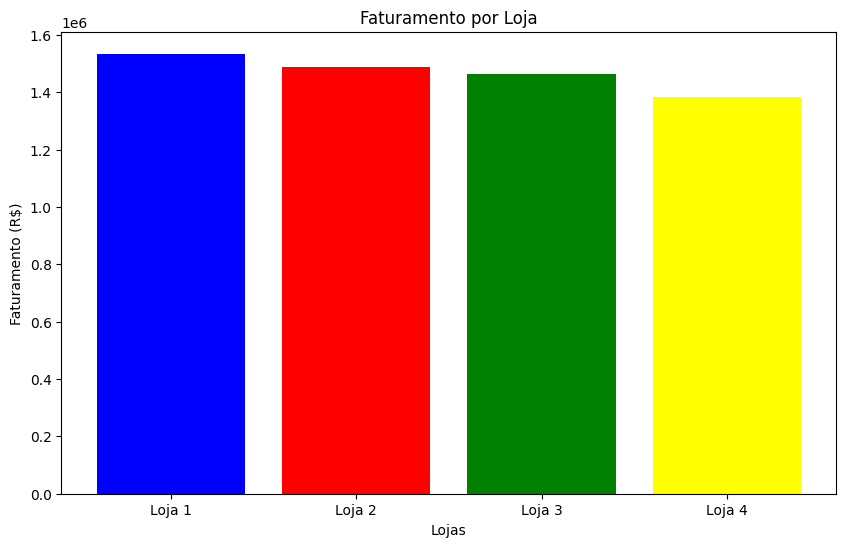

In [ ]:
import matplotlib.pyplot as plt

faturamento_por_loja = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

lojas = list(faturamento_por_loja.keys())
faturamentos = list(faturamento_por_loja.values())

plt.figure(figsize=(10, 6))
plt.bar(lojas, faturamentos, color=['blue', 'red', 'green', 'yellow'])
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.title("Faturamento por Loja")
plt.show()


# 2. Vendas por Categoria


In [ ]:
vendas_por_categoria = lojas.groupby('Categoria do Produto')['Preço'].sum()
vendas_por_categoria

,Preço
Categoria do Produto,
brinquedos,98140.86
eletrodomesticos,1766337.03
eletronicos,2214099.72
esporte e lazer,190635.39
instrumentos musicais,465029.67
livros,50260.74
moveis,1010214.00
utilidades domesticas,76773.38


# 3. Média de Avaliação das Lojas

In [ ]:
print(f"A quantidade de lojas analisadas é: {len([loja, loja2, loja3, loja4])}")

A quantidade de lojas analisadas é: 4


In [ ]:
import pandas as pd
media_avaliacoes = pd.DataFrame()
media_avaliacoes['Loja'] = [1,2,3,4]
media_avaliacoes['Media'] = [loja['Avaliação da compra'].mean(), loja2['Avaliação da compra'].mean(), loja3['Avaliação da compra'].mean(), loja4['Avaliação da compra'].mean()]
media_avaliacoes

,Loja,Media
0,1,3.976685
1,2,4.037304
2,3,4.048326
3,4,3.995759


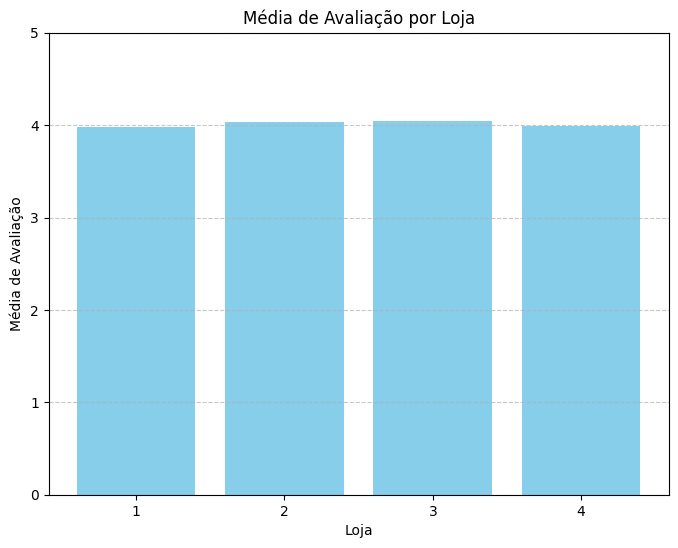

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(media_avaliacoes['Loja'], media_avaliacoes['Media'], color='skyblue')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Média de Avaliação por Loja')
plt.xticks(media_avaliacoes['Loja'])
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


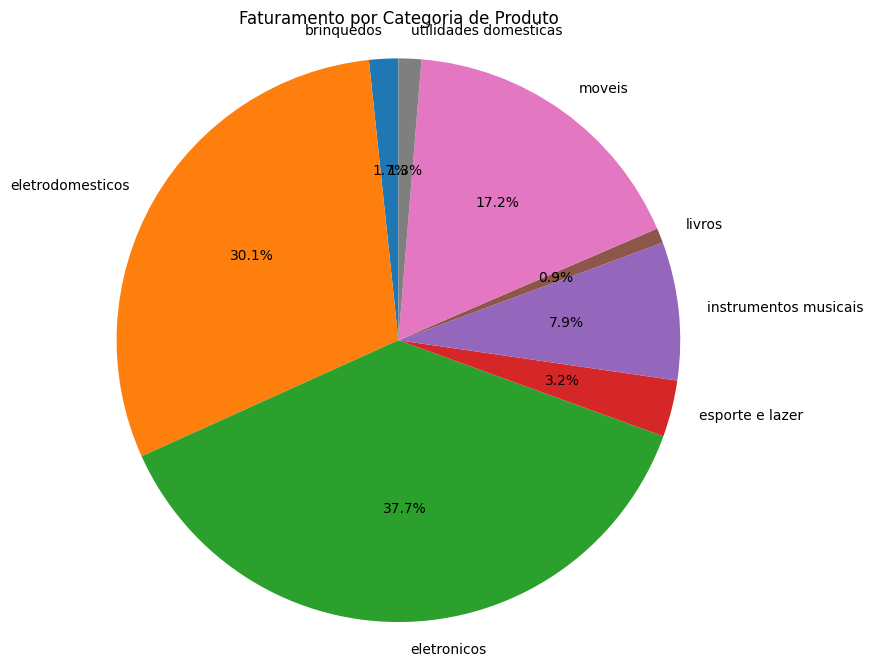

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=90)
plt.title('Faturamento por Categoria de Produto')
plt.axis('equal')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:
quantidade_produtos = lojas['Produto'].value_counts()
quantidade_produtos

,count
Produto,
Cômoda,210
Micro-ondas,206
Carrinho controle remoto,206
Bateria,203
Cama king,201
Jogo de panelas,200
Secadora de roupas,200
Modelagem preditiva,200
Cama box,199


In [ ]:

top_3_produtos = quantidade_produtos.head(3)
print("Os 3 produtos mais vendidos:")
print(top_3_produtos)

bottom_3_produtos = quantidade_produtos.tail(3)
print("\nOs 3 produtos menos vendidos:")
bottom_3_produtos


Os 3 produtos mais vendidos:
Produto
Cômoda                      210
Micro-ondas                 206
Carrinho controle remoto    206
Name: count, dtype: int64

Os 3 produtos menos vendidos:


,count
Produto,
Mochila,163
Headset,158
Celular ABXY,157


# 5. Frete Médio por Loja


In [ ]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"Frete médio da loja 1: R${frete_medio_loja1:.2f}")
print(f"Frete médio da loja 2: R${frete_medio_loja2:.2f}")
print(f"Frete médio da loja 3: R${frete_medio_loja3:.2f}")
print(f"Frete médio da loja 4: R${frete_medio_loja4:.2f}")

Frete médio da loja 1: R$34.69
Frete médio da loja 2: R$33.62
Frete médio da loja 3: R$33.07
Frete médio da loja 4: R$31.28


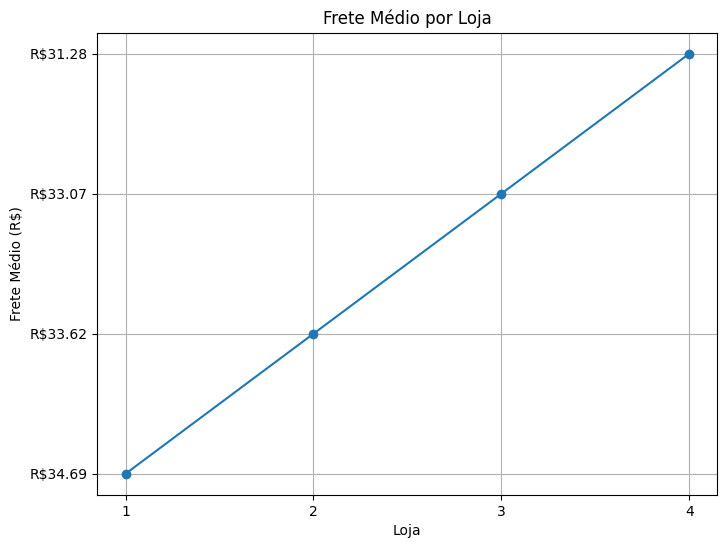

In [ ]:
import matplotlib.pyplot as plt

lojas = [1, 2, 3, 4]
fretes_medios = ['R$34.69', 'R$33.62', 'R$33.07', 'R$31.28']

plt.figure(figsize=(8, 6))
plt.plot(lojas, fretes_medios, marker='o', linestyle='-')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.title('Frete Médio por Loja')
plt.xticks(lojas)
plt.grid(True)

In [ ]:
frete_medio_geral = pd.concat([loja, loja2, loja3, loja4])['Frete'].mean()
print(f"O frete médio geral é: R${frete_medio_geral:.2f}")

O frete médio geral é: R$33.17


6. Relatório

Após uma análise cuidadosa de desempenho das quatro lojas sob a gestão do Senhor João, foram considerados diversos indicadores importantes para determinar qual unidade apresenta menor rentabilidade e menor potencial de crescimento. A seguir, são apresentados os principais pontos:

  1. Faturamento Total das Lojas

O faturamento é um dos indicadores mais relevantes para avaliar a saúde financeira de uma loja. A loja 4 apresenta o menor faturamento entre todas, com R$1.384.497,58, ficando atrás da loja 3 (R$1.464.025,03), loja 2 (R$1.488.459,06) e loja 1 (R$1.534.509,12). Isso indica um desempenho comercial mais fraco e menor geração de receita.

  2. Categorias de Produtos Mais e Menos Vendidas

Entre as categorias mais vendidas estão eletrônicos (R$2.214.099,72) e eletrodomésticos (R$1.766.337,03), enquanto livros (R$50.260,74), utilidades domésticas (R$76.773,38) e brinquedos (R$98.140,86) estão entre as menos vendidas. Se a loja 4 possui foco maior nas categorias com menor saída, isso pode contribuir diretamente para seu desempenho mais fraco.

  3. Avaliação Média dos Clientes

A satisfação do cliente é essencial para a fidelização e reputação da marca. A loja 4 apresenta uma média de avaliação de 3,99, que, apesar de não ser baixa, está abaixo das lojas 2 (4,03) e 3 (4,05). Esse detalhe reforça que há espaço para melhorias na experiência do cliente nesta unidade.

  4. Produtos Mais e Menos Vendidos

Os produtos mais vendidos são cômoda (210 unidades), micro-ondas (206) e carrinho de controle remoto (206), enquanto os menos vendidos incluem mochila (163), headset (158) e celular ABXY (157). A menor presença ou baixa rotatividade dos itens mais populares na loja 4 pode explicar seu desempenho inferior.

  5. Frete Médio por Loja

O custo de frete pode influenciar diretamente na decisão de compra. A loja 4 tem o frete mais barato, com média de R$31,28 — o que é positivo. No entanto, mesmo com essa vantagem competitiva, seu faturamento continua sendo o menor, o que indica que esse fator isolado não está sendo suficiente para atrair clientes.
Conclusão

Levando em consideração o menor faturamento, a avaliação de clientes abaixo da média geral, a possível menor participação em categorias e produtos de alta demanda, e apesar do frete mais barato, a loja 4 se destaca negativamente nos principais indicadores analisados.

 A recomendação para o Senhor João seria considerar a venda da Loja 4, pois ela representa o menor retorno financeiro e apresenta menos sinais de crescimento em comparação com as demais unidades. Com essa decisão, será possível concentrar esforços e investimentos nas lojas mais rentáveis e com maior potencial de expansão.